In [24]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [26]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df = df.dropna()
df_saidas = df.pop("stroke")

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [28]:
df_saidas

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [29]:
df = pd.get_dummies(df)
df_saidas = df_saidas.replace(0, -1)



df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,31112,80.0,0,1,105.92,32.5,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,True,False,False,True,...,False,False,False,True,True,False,True,False,False,False
5106,44873,81.0,0,0,125.20,40.0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.6,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [30]:
df = df.drop("id", axis = 1)
df = df.drop("bmi", axis = 1)
df = df.drop("avg_glucose_level", axis = 1)



In [31]:
X_train, X_test, y_train, y_test = train_test_split(df, df_saidas, train_size=0.5)


Acurácia: 0.9356415478615071
[0.47666224 0.03772632 0.0255638  0.05479903 0.03108555 0.
 0.01548409 0.01873452 0.02707681 0.         0.02605565 0.03561179
 0.00285392 0.05753561 0.03038948 0.0290955  0.05413667 0.03929744
 0.03789157]


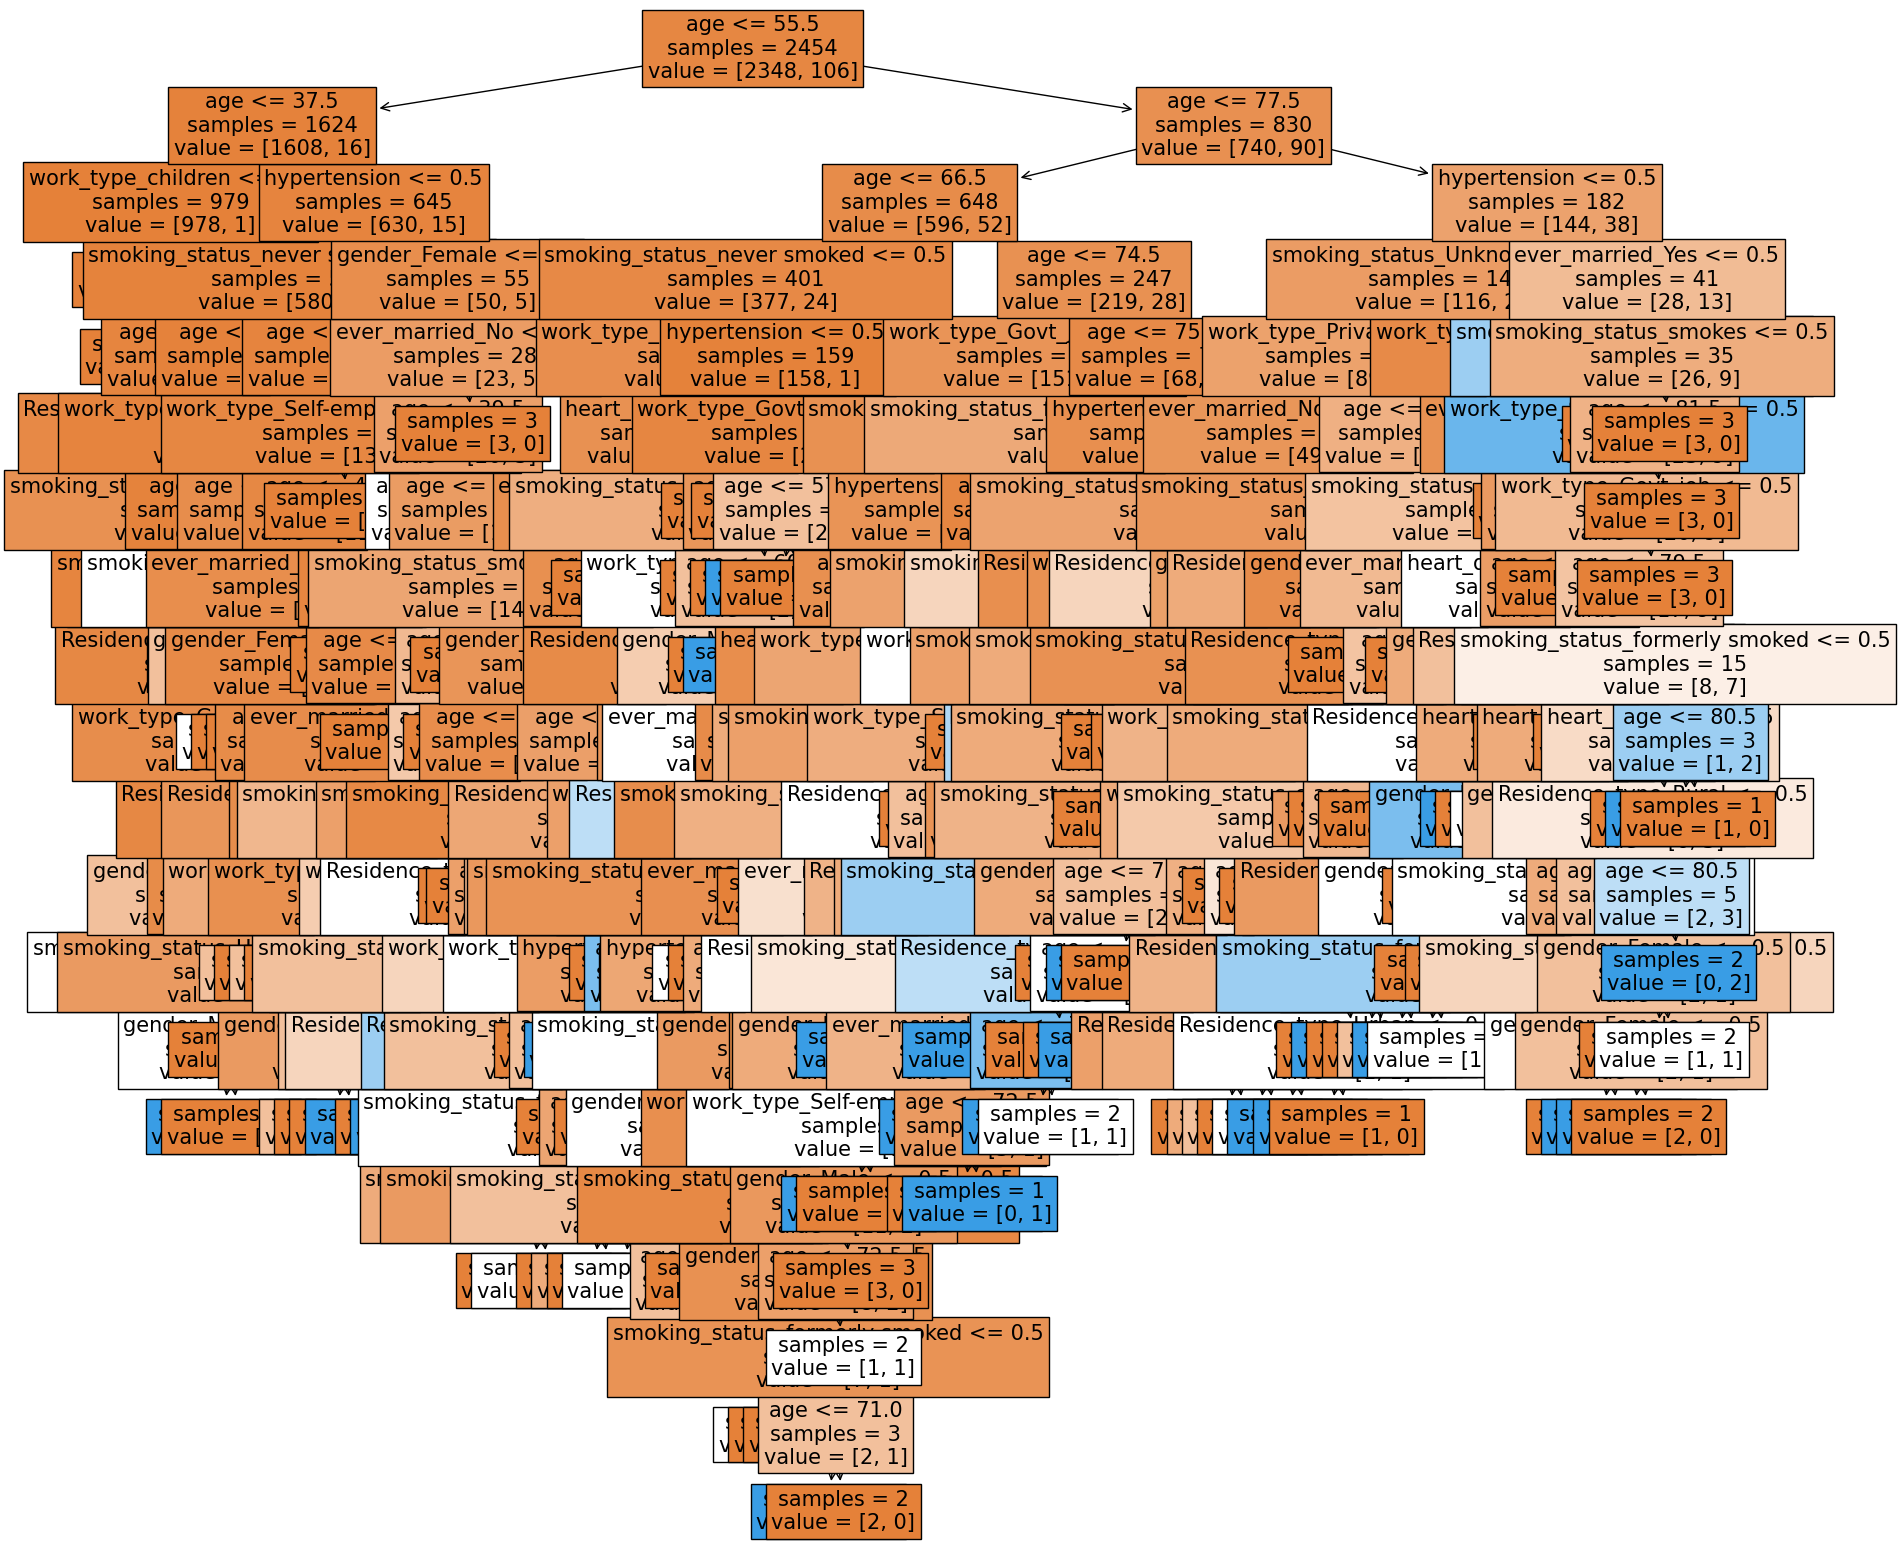

In [32]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

# Faça previsões nos dados de teste usando a árvore treinada
y_pred = tree.predict(X_test)

# Calcule a acurácia das previsões
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", acc)
print(tree.feature_importances_)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

In [33]:
X_train.shape
y_train.shape

(2454,)

In [34]:
X_train = X_train.to_numpy()
X_train = X_train.T
y_train = y_train.to_numpy()


X_train  = X_train.astype(float)
y_train  = y_train.astype(float)


X_test = X_test.to_numpy()
X_test = X_test.T


y_test = y_test.to_numpy()


X_test  = X_test.astype(float)
y_test  = y_test.astype(float)



print(y_test.shape)

(2455,)


In [36]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))


import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = X_train
alvos = y_train

w = np.random.randn( 19, 1)
b = np.random.randn()
alpha = 10**-4

for n in range(10000):

    grad_ = g( (w, b, pontos, alvos) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

print(w)
print(b)
print(len(grad_))

[[-0.01267287]
 [ 0.72961151]
 [ 1.14664429]
 [ 0.50986974]
 [ 0.70283622]
 [-1.70350909]
 [-0.67835776]
 [-0.60615611]
 [-0.59780013]
 [-0.34923652]
 [-0.09419193]
 [ 1.29493108]
 [-0.71266941]
 [ 0.57496615]
 [ 0.82450768]
 [-0.2899027 ]
 [-0.77314844]
 [-0.33273624]
 [-0.68434982]]
-0.6728090404076247
4


In [ ]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

In [ ]:
y_est = w.T @ X_test + b
print(f"{accuracy(y_test, y_est)*100} %")

[-1. -1. -1. ... -1. -1. -1.]
80.12219959266803 %
